In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = r'C:\Users\Karan\707-group-project-KaranShah1\data\Extracted Data FetalLife.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)

# Now, 'data' contains the contents of the CSV file


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Karan\\707-group-project-KaranShah1\\data\\Extracted Data FetalLife.csv'

In [ ]:

description = data.describe()

# This will give you statistics such as count, mean, standard deviation, minimum, and maximum for each numerical column in the DataFrame.
print(description)


          PatientId  Pregnancyweek  SystolicValue  DiastolicValue  \
count  60826.000000   60826.000000   51951.000000    51951.000000   
mean   30950.304738      10.863233     124.992493       80.399935   
std    17863.910797      16.312393      10.765922        3.560157   
min        2.000000   -2151.000000     100.000000       63.000000   
25%    15458.250000       0.000000     115.000000       80.000000   
50%    30851.500000       6.000000     129.000000       80.000000   
75%    46471.750000      19.000000     129.000000       81.000000   
max    61839.000000      40.000000     161.000000       88.000000   

             Weight  
count  55243.000000  
mean     155.839634  
std       45.831011  
min       25.000000  
25%      131.000000  
50%      161.700000  
75%      175.000000  
max      398.000000  


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60826 entries, 0 to 60825
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientId            60826 non-null  int64  
 1   Pregnancyweek        60826 non-null  int64  
 2   FirstPregnancy       60826 non-null  bool   
 3   GestationalDiabetes  60826 non-null  bool   
 4   Preclemsia           60826 non-null  bool   
 5   PretermBirth         60826 non-null  bool   
 6   StillBirth           60826 non-null  bool   
 7   Hypertension         60826 non-null  bool   
 8   DrugAbuse            60826 non-null  bool   
 9   Smoker               60826 non-null  bool   
 10  Alcohol              60826 non-null  bool   
 11  IsConceive           60826 non-null  bool   
 12  SystolicValue        51951 non-null  float64
 13  DiastolicValue       51951 non-null  float64
 14  PatientMedicines     59543 non-null  object 
 15  MedicineDosage       59543 non-null 

In [ ]:
# Assuming you've already read the data into a DataFrame as 'data'
first_10_rows = data.head(10)

# This will display the first 10 rows of your dataset.
print(first_10_rows)


   PatientId  Pregnancyweek  FirstPregnancy  GestationalDiabetes  Preclemsia  \
0        438              0           False                False       False   
1        440              0           False                False       False   
2        864              0           False                False       False   
3       1012              0           False                False       False   
4       1105              0           False                False       False   
5       1256              0           False                False       False   
6       1258              0           False                False       False   
7       1265              0           False                False       False   
8       1277              0           False                False       False   
9       1279              0           False                False       False   

   PretermBirth  StillBirth  Hypertension  DrugAbuse  Smoker  Alcohol  \
0         False       False         False     

In [ ]:
# Assuming 'data' is your DataFrame
columns_to_convert = ['FirstPregnancy', 'GestationalDiabetes', 'Preclemsia', 'PretermBirth', 'StillBirth', 'Hypertension', 'DrugAbuse', 'Smoker', 'Alcohol']

# Loop through the columns and convert True/False to 1/0
for col in columns_to_convert:
    data[col] = data[col].astype(int)

# Now, the columns contain 1 and 0 instead of True and False.


In [ ]:
# Assuming 'data' is your DataFrame
first_10_rows = data.head(10)

# This will display the first 10 rows of your DataFrame, including the converted values in the specified columns.
print(first_10_rows)


   PatientId  Pregnancyweek  FirstPregnancy  GestationalDiabetes  Preclemsia  \
0        438              0               0                    0           0   
1        440              0               0                    0           0   
2        864              0               0                    0           0   
3       1012              0               0                    0           0   
4       1105              0               0                    0           0   
5       1256              0               0                    0           0   
6       1258              0               0                    0           0   
7       1265              0               0                    0           0   
8       1277              0               0                    0           0   
9       1279              0               0                    0           0   

   PretermBirth  StillBirth  Hypertension  DrugAbuse  Smoker  Alcohol  \
0             0           0             0     

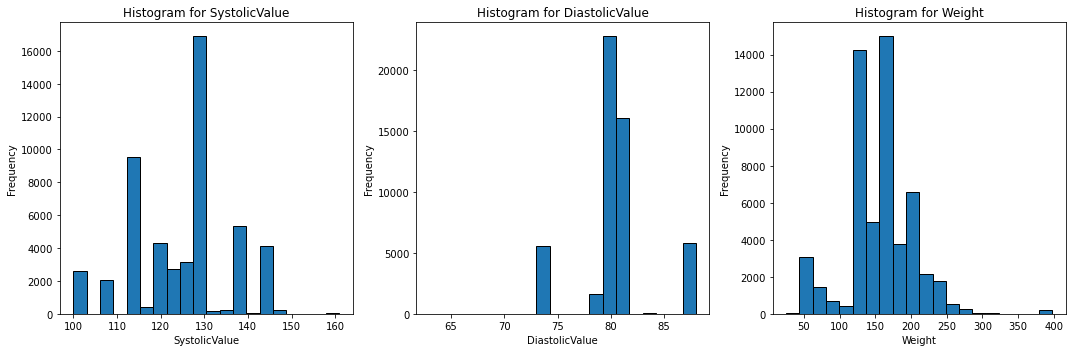

In [ ]:
import matplotlib.pyplot as plt

# Select the columns you want to visualize (both converted and already numerical)
columns_to_visualize = [
    'SystolicValue', 'DiastolicValue', 'Weight'
]

# Determine the number of rows and columns for the grid
num_rows = 1  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Create visualizations for each column
for i, col in enumerate(columns_to_visualize):
    ax = axes[i]
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        ax.hist(data[col], bins=20, edgecolor='black')
        ax.set_title(f'Histogram for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    else:
        ax.text(0.5, 0.5, f'Cannot plot\n{col}', ha='center', va='center', fontsize=12, transform=ax.transAxes)

plt.tight_layout()
plt.show()


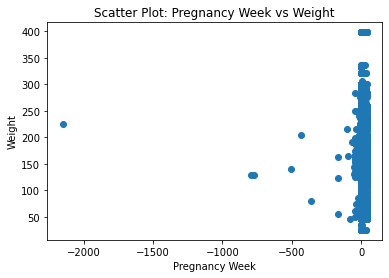

In [ ]:
import matplotlib.pyplot as plt


# Scatter plot of Pregnancyweek vs Weight
plt.scatter(data['Pregnancyweek'], data['Weight'])
plt.title('Scatter Plot: Pregnancy Week vs Weight')
plt.xlabel('Pregnancy Week')
plt.ylabel('Weight')
plt.show()


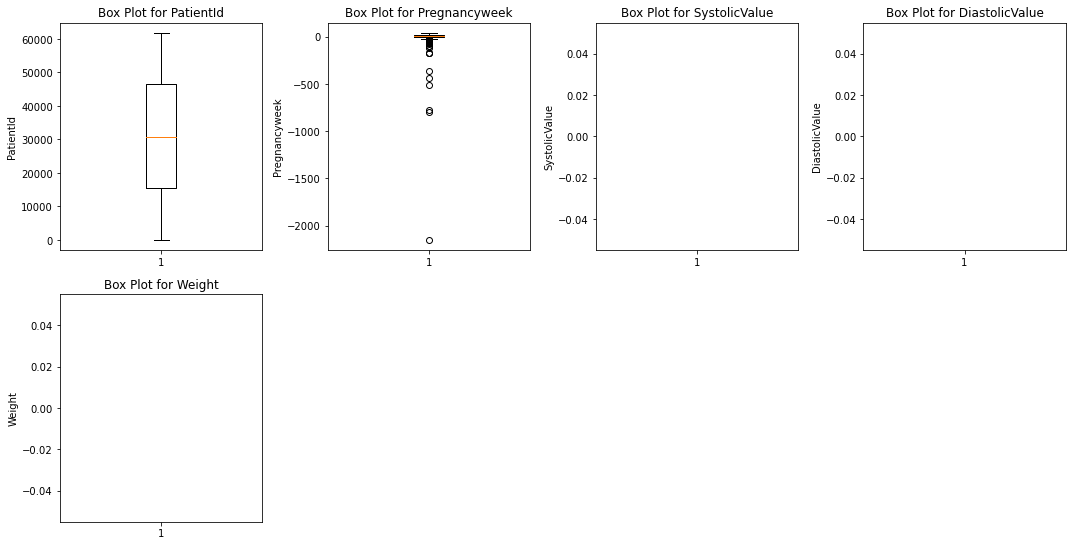

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

# Select the numerical columns for which you want to check outliers
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplot grid
num_rows = 4  # Adjust as needed
num_cols = 4  # Adjust as needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the 2D array of subplots for easy iteration
axes = axes.ravel()

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(f'Box Plot for {col}')
    ax.set_ylabel(col)

# Remove any empty subplots
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


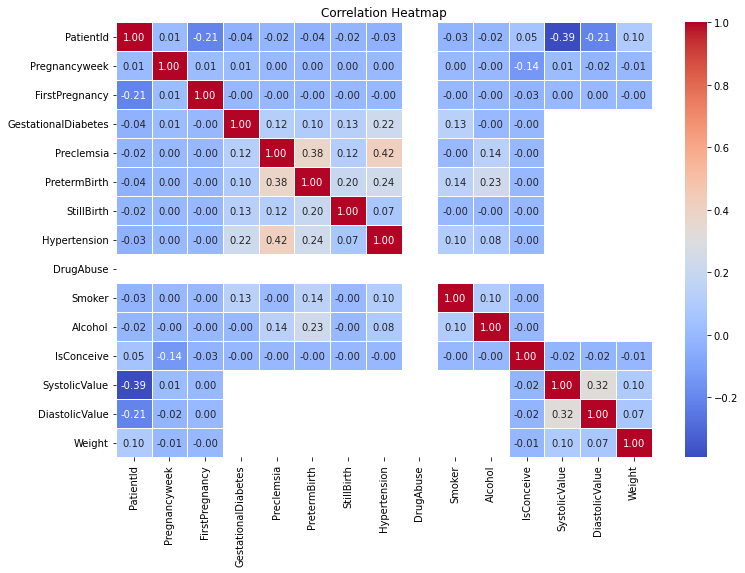

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all columns in the dataset
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
